# 

input_data가 테이블 데이터로 Deeplearning보다 Sklearn MachineLearning Classifier가 더 적합하다고 판단<br>
<b>kNN, DecisionTree, RandomForest, Naivebayes, svm</b> 중 cross_val_score accuracy 점수로 성능 판단

# 

# *Data Load*

In [1]:
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load('../../data/df_users_whole_info.pickle')

extension : .pickle
Loaded 396808 records from ../../data/df_users_whole_info.pickle


In [3]:
df.head()

,user_uuid,marketing_channel,sex,age_group,date_joined,os,visits,revenue
0,05b0058df377da90c21c585649cbf415,0,0,1,4,0,23,304.0
1,28b7062943065c84bb902a0c1d018398,1,0,0,4,0,5,195.0
2,f8c30b791fbe2d6c80585b20fb6fdbe0,0,0,1,4,0,1,78.0
3,91cd8505d196bea35d48f4f1eacbc106,0,1,1,4,1,18,202.0
4,4b34dfb277abb6ad04dcf6968fe416d0,0,0,1,4,0,9,197.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396808 entries, 0 to 405084
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_uuid          396808 non-null  object 
 1   marketing_channel  396808 non-null  int64  
 2   sex                396808 non-null  int64  
 3   age_group          396808 non-null  int64  
 4   date_joined        396808 non-null  int64  
 5   os                 396808 non-null  int64  
 6   visits             396808 non-null  int64  
 7   revenue            396808 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 27.2+ MB


# 

# *Data Split*

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = df[['sex', 'age_group', 'date_joined', 'os', 'visits', 'revenue', 'marketing_channel']]

In [7]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
print(len(df))
print(len(train_data))
print(len(test_data))

396808
317446
79362


In [9]:
train_X = train_data.iloc[:,:6]
train_y = train_data.iloc[:,-1]

test_X = test_data.iloc[:,:6]
test_y = test_data.iloc[:,-1]

In [10]:
print(f"train_X : {train_X.columns}")
print(f"train_y : {train_y[:3]}")

print(f"test_X : {test_X.columns}")
print(f"test_y : {test_y[:3]}")

train_X : Index(['sex', 'age_group', 'date_joined', 'os', 'visits', 'revenue'], dtype='object')
train_y : 28350     1
29269     0
153715    0
Name: marketing_channel, dtype: int64
test_X : Index(['sex', 'age_group', 'date_joined', 'os', 'visits', 'revenue'], dtype='object')
test_y : 201127    0
293944    0
316114    1
Name: marketing_channel, dtype: int64


# 

# *Classifier*

In [11]:
import numpy as np
# kNN
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# 나이브 베이즈
from sklearn.naive_bayes import GaussianNB
# 서포터 벡터 머신
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import KFold, cross_val_score

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317446 entries, 28350 to 124490
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sex                317446 non-null  int64  
 1   age_group          317446 non-null  int64  
 2   date_joined        317446 non-null  int64  
 3   os                 317446 non-null  int64  
 4   visits             317446 non-null  int64  
 5   revenue            317446 non-null  float64
 6   marketing_channel  317446 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 19.4 MB


In [14]:
scoring = 'accuracy'
k_fold = KFold(shuffle = True, random_state=0)

##### knn

In [15]:
knn_clf = KNeighborsClassifier()
knn_clf = knn_clf.fit(train_X, train_y)
knn_score = cross_val_score(knn_clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)

In [16]:
knn_score = round(np.mean(knn_score) * 100, 2)
print(f"knn_score : {knn_score}")

knn_score : 77.16


##### decision tree

In [17]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(train_X, train_y)
dt_score = cross_val_score(dt_clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)

In [18]:
dt_score = round(np.mean(dt_score) * 100, 2)
print(f"DecisionTree_score : {dt_score}")

DecisionTree_score : 76.44


##### random forest

In [19]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(train_X, train_y)
rf_score = cross_val_score(rf_clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)

In [20]:
rf_score = round(np.mean(rf_score) * 100, 2)
print(f"RandomForest_score : {rf_score}")

RandomForest_score : 76.35


##### naive bayes

In [21]:
nb_clf = GaussianNB()
nb_clf = nb_clf.fit(train_X, train_y)
nb_score = cross_val_score(nb_clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)

In [22]:
nb_score = round(np.mean(nb_score) * 100, 2)
print(f"naivebayes_score : {nb_score}")

naivebayes_score : 80.59


##### svm

In [ ]:
svm_clf = SVC()
svm_clf = svm_clf.fit(train_X, train_y)
svm_score = cross_val_score(svm_clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)

In [24]:
svm_score = round(np.mean(svm_score) * 100, 2)
print(f"svm_score : {svm_score}")

svm_score : 81.02


### sex, age_group, date_joined, os, visit, revenue → marketing_channel
kNN_score : 77.16<br>
DecisionTree_score : 76.44<br>
RandomForest_score : 76.35<br>
naivebayes_score : 80.59<br>
svm_score : 81.02

### Graph

In [1]:
import matplotlib.pyplot as plt

In [2]:
list_x = ['kNN', 'DecisionTree', 'RandomForest', 'Naivebayes', 'SVM']
list_y = [77.16, 76.44, 76.35, 80.59, 81.02]

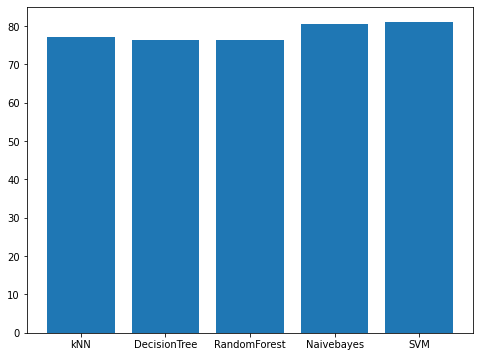

In [4]:
plt.figure(figsize=(8,6))
plt.bar(list_x, list_y)
plt.show()

# 

모든 변수(sex, age_group, date_joined, os, visit, revenue)를 입력할 때,<br>
SVM Accuracy Score가 가장 높으므로 <b>SVM model</b> 채택